# NLP using Spacy

The first step for a text string, when working with spaCy, is to pass it to an NLP object. This object is essentially a pipeline of several text pre-processing operations through which the input text string has to go through.  The NLP pipeline has multiple components, such as tokenizer, tagger, parser, ner, etc. So, the input text string has to go through all these components before we can work on it.

![](spacy_pipeline.png)

## Data: Small sample of trump's tweets

In [10]:
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import spacy 

path = Path.cwd()

In [11]:
tweets = pd.read_csv(path / "djt_tweets_small.csv", usecols=['text', 'source'])
print(tweets.shape)
tweets.head()

(488, 2)


,source,text
0,Twitter for iPhone,Over 90% approval rating for your all time fav...
1,Twitter for iPhone,“Mainstream Media tries to rewrite history to ...
2,Twitter for iPhone,Fantastic numbers on consumer spending release...
3,Twitter for iPhone,"...And it will get, as I have always said, muc..."
4,Twitter for iPhone,RT @realDonaldTrump: Social Media Giants are s...


## WORD TOKENIZE

In [12]:
# Load model to return language object
nlp = spacy.load("en_core_web_sm")

# Calling nlp on our tweet texts to return a processed Doc for each
tweets['doc'] = [nlp(text) for text in tweets.text]
tweets.sample(3)

,source,text,doc
17,Twitter for iPhone,"Happy birthday Vince, you are truly one of the...","(Happy, birthday, Vince, ,, you, are, truly, o..."
117,Twitter for iPhone,.....released in 2017. If his statement is bas...,"(....., released, in, 2017, ., If, his, statem..."
233,Twitter for iPhone,John James is a potential Republican Star who ...,"(John, James, is, a, potential, Republican, St..."


In [4]:
tweets['doc'][0]

Over 90% approval rating for your all time favorite (I hope) President within the Republican Party and 52% overall. This despite all of the made up stories by the Fake News Media trying endlessly to make me look as bad and evil as possible. Look at the real villains please!

In [5]:
print(list(tweets['doc'][0]))

[Over, 90, %, approval, rating, for, your, all, time, favorite, (, I, hope, ), President, within, the, Republican, Party, and, 52, %, overall, ., This, despite, all, of, the, made, up, stories, by, the, Fake, News, Media, trying, endlessly, to, make, me, look, as, bad, and, evil, as, possible, ., Look, at, the, real, villains, please, !]


## LEMMA

Shows the root of s word

In [6]:
tweets['text'][50]

'Longest bull run in the history of the stock market, congratulations America!'

In [7]:
for token in tweets['doc'][50]:
    print(token, token.lemma_)

Longest long
bull bull
run run
in in
the the
history history
of of
the the
stock stock
market market
, ,
congratulations congratulation
America America
! !


# POS tags

POS tag helps us to know the tags of each word like whether a word is noun, adjective etc.

In [8]:
print(tweets.text[300])

Incredibly beautiful ceremony as U.S. Korean War remains are returned to American soil. Thank you to Honolulu and all of our great Military participants on a job well done. A special thanks to Vice President Mike Pence on delivering a truly magnificent tribute!


In [9]:
for token in tweets.doc[300]:
    print (token, token.pos_)

Incredibly ADV
beautiful ADJ
ceremony NOUN
as SCONJ
U.S. PROPN
Korean PROPN
War PROPN
remains VERB
are AUX
returned VERB
to ADP
American ADJ
soil NOUN
. PUNCT
Thank VERB
you PRON
to ADP
Honolulu PROPN
and CCONJ
all DET
of ADP
our DET
great ADJ
Military ADJ
participants NOUN
on ADP
a DET
job NOUN
well ADV
done VERB
. PUNCT
A DET
special ADJ
thanks NOUN
to ADP
Vice PROPN
President PROPN
Mike PROPN
Pence PROPN
on ADP
delivering VERB
a DET
truly ADV
magnificent ADJ
tribute NOUN
! PUNCT


## NER

NER(Named Entity Recognition) is the process of getting the entity names

In [10]:
def id_entity(doc):
    '''
    Highlights entity names in a tweet
    '''

    spacy.displacy.render(doc, style='ent', jupyter=True)

In [11]:
id_entity(tweets.doc[0])

In [12]:
id_entity(tweets.doc[240])

In [13]:
id_entity(tweets.doc[450])

## Redact names

In [8]:
def redact_names(doc):
    '''
    Redact person names in a tweet
    '''
    
    redacted_sentence = []
    for token in doc:
        if token.ent_type_ == "PERSON":
            redacted_sentence.append("[REDACTED]")
        else:
            redacted_sentence.append(token.string)
    
    return "".join(redacted_sentence)

In [9]:
redact_names(tweets.doc[240])

'[REDACTED][REDACTED]: ...[REDACTED][REDACTED]is a total puppet for [REDACTED][REDACTED]and Maxine Waters – [REDACTED]wants to raise your taxes, open your bo…'

## STOP WORDS REMOVAL

In [16]:
print(list(tweets['doc'][0]))

[Over, 90, %, approval, rating, for, your, all, time, favorite, (, I, hope, ), President, within, the, Republican, Party, and, 52, %, overall, ., This, despite, all, of, the, made, up, stories, by, the, Fake, News, Media, trying, endlessly, to, make, me, look, as, bad, and, evil, as, possible, ., Look, at, the, real, villains, please, !]


In [18]:
def remove_stop_words(doc, only_nouns=False):
    '''
    Takes a tweet and removes the stop words and punctuation if only_nouns=False. If only_nouns=True
    only nouns are kept.
    '''
    
    new_text = []
    for token in doc:
        if (not only_nouns) and (not token.is_stop) and (not token.is_punct):
            new_text.append(token.text.lower())
        elif (not token.is_stop) and (not token.is_punct) and (token.pos_ == "NOUN"):
            new_text.append(token.text.lower())
    
    return new_text

words = remove_stop_words(tweets['doc'][0])
print(words)

['90', 'approval', 'rating', 'time', 'favorite', 'hope', 'President', 'Republican', 'Party', '52', 'overall', 'despite', 'stories', 'Fake', 'News', 'Media', 'trying', 'endlessly', 'look', 'bad', 'evil', 'possible', 'Look', 'real', 'villains']


## What does Trump talk about?

One way to explore this would be to mine out all the nouns from all his tweets!

In [19]:
text = tweets['text'].str.cat(sep=' ')
doc = nlp(text)
text[0:1000]

'Over 90% approval rating for your all time favorite (I hope) President within the Republican Party and 52% overall. This despite all of the made up stories by the Fake News Media trying endlessly to make me look as bad and evil as possible. Look at the real villains please! “Mainstream Media tries to rewrite history to credit Obama for Trump accomplishments. Since President Trump took office, the economy is booming. The stronger the economy gets, the more desperate his critics are. O had weakest recovery since Great Depression.” @WashTimes Fantastic numbers on consumer spending released on Friday. Stock Market hits all time high! ...And it will get, as I have always said, much better from even here! https://t.co/El26RzBjpG RT @realDonaldTrump: Social Media Giants are silencing millions of people. Can’t do this even if it means we must continue to hear Fake New… RT @realDonaldTrump: Big story out that the FBI ignored tens of thousands of Crooked Hillary Emails, many of which are REALLY

In [20]:
trump_topics = remove_stop_words(doc, only_nouns=True)
df_nouns = pd.DataFrame(trump_topics, columns=["Trump Topics"])
df_nouns.head()

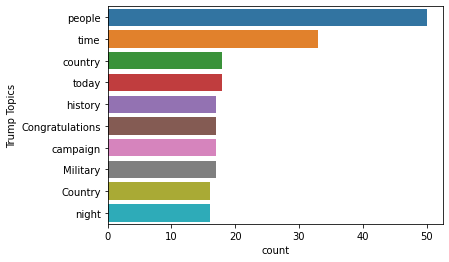

In [23]:
sns.countplot(y="Trump Topics",
             data=df_nouns,
             order=df_nouns["Trump Topics"].value_counts().iloc[:10].index)
plt.show()